<br/>
$$ \huge{\underline{\textbf{ 1-Layer Neural Network }}} $$
<br/>

Contents:
* [Introduction](#Introduction)
* [Neural Network](#Neural-Network)
* [Math](#Math)
* [Solve AND](#Solve-AND)
* [Solve College Admissions](#Solve-College-Admissions)
* [Numerical Gradient Check](#Numerical-Gradient-Check)

# Introduction

This notebook presents reference implementation of **1-layer neural network** trained with backpropagation.

I say "neural network", but whole neural network is just single neuron with sigmoid activaiton function. We are going to use binary cross-entropy loss function because it has better convergence properties than mean squared error (as explained [here](http://neuralnetworksanddeeplearning.com/chap3.html#the_cross-entropy_cost_function). Fitting such single-layer single-neuron model is also called binary logistic regression.

**Model**

* one layer: **fully connected** with **sigmoid** activation
* loss: **binary cross-entropy**
* optimizer: **vanilla SGD**

**Recommended Reading**

* *Neural Networks and Deep Learning* by Michael Nilsen - great free introductory book [here](http://neuralnetworksanddeeplearning.com/)
* *Understanding Categorical Cross-Entropy Loss, Binary Cross-Entropy Loss, Softmax Loss, Logistic Loss, Focal Loss and all those confusing names* - great post explaining loss functions [here](https://gombru.github.io/2018/05/23/cross_entropy_loss/)

# Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt

This function contains everything. Pass in full dataset (inputs x, targets y) and randomly initialized weights $W$ and biases $b$. This function trains on whole dataset at once, i.e. it doesn't pick mini-batches. $W$ and $b$ are updated in-place.

$$ 
\begin{matrix}
 \uparrow \\ 
 \small{\text{batch_size}} \\ 
 \downarrow
\end{matrix}
\quad
\underset{z}{
  \begin{bmatrix}
  \cdot \\  
  \cdot \\ 
  \cdot
  \end{bmatrix}
} = 
\underset{x}{
  \begin{bmatrix}
  \cdot & \cdot & \cdot \\  
  \cdot & \cdot & \cdot \\ 
  \cdot & \cdot & \cdot
  \end{bmatrix}
}
\underset{W}{
  \begin{bmatrix}
  \cdot  \\ 
  \cdot  \\ 
  \cdot 
  \end{bmatrix}
}
+
\underset{b}{
  \begin{bmatrix}
  \cdot \\ 
  \downarrow  \\ 
  \
  \end{bmatrix}
}
$$

In [2]:
def train_classifier(x, y, nb_epochs, W, b):
    """Params:
        x - inputs  - shape: (batch_size, nb_inputs)
        y - targets - shape: (batch_size, nb_outputs)
        W - weights, modified in place - shape: (nb_inputs, nb_outputs)
        b - biases, modified in place  - shape: (1, nb_outputs)
    Note: in this notebook nb_outputs is always equal to one
    """
    losses = []                                                 # keep track of losses for plotting

    for e in range(nb_epochs):
                
        # Forward Pass
        z = x @ W + b                                           # (eq 1)    z.shape: (batch_size, nb_neurons)
        y_hat = sigmoid(z)                                      # (eq 2)    y_hat.shape: (batch_size, nb_neurons)
        
        # Backward Pass
        rho = y_hat - y                                         # (eq 3)    combined sigmoid and binary CE derivative
        dW = (x.T @ rho) / len(x)                               # (eq 6)    backprop through matmul
        db = np.sum(rho, axis=0, keepdims=True) / len(x)        # (eq 7)
        
        # Gradient Check (defined at the end of the notebook)
        # ngW, ngb = numerical_gradient(x, y, W, b)
        # assert np.allclose(ngW, dW) and np.allclose(ngb, db)

        W += -lr * dW
        b += -lr * db

        # Train loss
        loss_train = loss(y, y_hat)                             # binary cross-entropy
        losses.append(loss_train)                               # save for plotting

        if e % (nb_epochs / 10) == 0:
            print('loss ', loss_train.round(4))
            
    return losses

Helper Functions

In [3]:
def forward(x, W, b):                                 #                        x.shape (batch_size, nb_inputs)
    return sigmoid( x @ W + b )                       #                        shape: (batch_size, nb_outputs)

In [4]:
def loss(y, y_hat):                                   #                        y_hat, y shapes: (batch_size, nb_outputs)
    result = -y*np.log(y_hat) -(1-y)*np.log(1-y_hat)  # (eq 4)   binary CE     result.shape: (batch_size, 1)
    return np.mean( result )                          # (eq 4)                 shape: scalar

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))                           # (eq 3)

# Math

Forward pass

$$ z = xW + b \tag{linear combination; eq 1}$$

$$ \hat{y} = S(z) \tag{model output; eq 2}$$

$$ S(z) = \frac{1}{1+\epsilon^{-z}} \tag{sigmoid, element-wise; eq 3} $$

$$ J(y,\hat{y}) =  \frac{1}{m} \sum_{t=1}^{m} \big[ -y_t \log(\hat{y_t}) - (1-y_t)\log(1-\hat{y_t}) \big] \tag{loss for the batch; eq 4} $$

Backward Pass




$$ \frac{\partial J}{\partial z} = \frac{1}{m} (\hat{y} - y) \tag{ derivative of both sigmoid and binary CE; eq 5}$$

$$ \frac{\partial J}{\partial W} = \frac{1}{m} x^T (\hat{y} - y) \tag{backprop through matmul; eq 6} $$

$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{t=1}^{m} (\hat{y} - y) \tag{eq 7} $$

Symbols

| symbol | shape | comment |
|-|-|-|
| $x$ | (batch_size, nb_inputs)  | inputs to model |
| $W$ | (nb_inputs, nb_outputs) | weights |
| $b$ | (1, nb_outputs) | biases |
| $z$ | (batch_size, nb_outputs) | preactivations |
| $y$ | (batch_size, nb_outputs) | targets |
| $\hat{y}$ | (batch_size, nb_outputs) | model outputs [0..1] |
| $S(z)$ | - | sigmoid function |
| m | - | same as batch_size |
| t | - | index of training example |
| $J(y, \hat{y})$ | scalar | loss function |

Comments, proofs
* (eq 4) binary cross-entropy, calculate per-training-example, then average to get mini-batch loss, more info [here](https://gombru.github.io/2018/05/23/cross_entropy_loss/)
* (eq 5) element wise derivative of both sigmoid and binary cross-entropy combined, [proof](https://www.ics.uci.edu/~pjsadows/notes.pdf)
* (eq 6) derivative of matrix multiplication, see [here](http://cs231n.stanford.edu/handouts/linear-backprop.pdf) and [here](http://cs231n.stanford.edu/handouts/derivatives.pdf)

# Solve AND

Mapping we are trying to learn:

| $x_1$ | $x_2$ | $y$ |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

Dataset

In [6]:
# training examples   x1   x2
x_train = np.array([[0.0, 0.0],
                    [0.0, 1.0],
                    [1.0, 0.0],
                    [1.0, 1.0]])

# training targets    y
y_train = np.array([[0.0],
                    [0.0],
                    [0.0],
                    [1.0]])

Create neural network (Xavier initialization explained quite well [here](http://andyljones.tumblr.com/post/110998971763/an-explanation-of-xavier-initialization))

In [7]:
# Hyperparams
nb_epochs = 2000
lr = 1

# Initialize
np.random.seed(0)                                                             # for reproducibility
nb_inputs, nb_outputs = 2, 1                                                  # 2 input columns, 1 output per example
W = np.random.normal(scale=1/nb_inputs**.5, size=[nb_inputs, nb_outputs])     # Xavier init
b = np.zeros(shape=[1, nb_outputs])                                           # ok to init biases to zeros

Before training, with randomly initialized $W$

In [8]:
y_hat = forward(x_train, W, b).round(2)
print('x1, x2   y     y_hat')
print('[0, 0]  [0]   ', y_hat[0])
print('[0, 1]  [0]   ', y_hat[1])
print('[1, 0]  [0]   ', y_hat[2])
print('[1, 1]  [1]   ', y_hat[3])

x1, x2   y     y_hat
[0, 0]  [0]    [0.5]
[0, 1]  [0]    [0.57]
[1, 0]  [0]    [0.78]
[1, 1]  [1]    [0.82]


Train neural network

In [9]:
losses = train_classifier(x_train, y_train, nb_epochs, W, b)

loss  0.8084
loss  0.0793
loss  0.0424
loss  0.0287
loss  0.0216
loss  0.0173
loss  0.0144
loss  0.0124
loss  0.0108
loss  0.0096


After training

In [10]:
y_hat = forward(x_train, W, b).round(2)
print('x1, x2  target     model ')
print('[0, 0]    [0]    ', y_hat[0])
print('[0, 1]    [0]    ', y_hat[1])
print('[1, 0]    [0]    ', y_hat[2])
print('[1, 1]    [1]    ', y_hat[3])

x1, x2  target     model 
[0, 0]    [0]     [0.]
[0, 1]    [0]     [0.01]
[1, 0]    [0]     [0.01]
[1, 1]    [1]     [0.99]


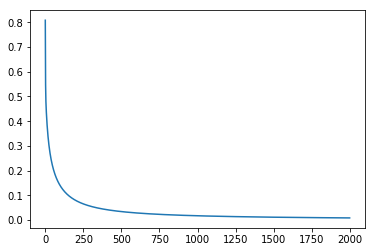

In [11]:
plt.plot(losses)

# Solve College Admissions

**Dataset**

We will use graduate school admissions data ([https://stats.idre.ucla.edu/stat/data/binary.csv]()). Each row is one student. Columns are as follows:
* admit - was student admitted or not? This is our target we will try to predict
* gre - student GRE score
* gpa - student GPA
* rank - prestige of undergrad school, 1 is highest, 4 is lowest

Extra Imports

In [12]:
import pandas as pd

Loda data with pandas

In [13]:
df = pd.read_csv('college_admissions.csv')

Show first couple rows. First column is index, added automatically by pandas.

In [14]:
df.head()

admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4

Show some more information about dataset.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


Plot data, each rank separately

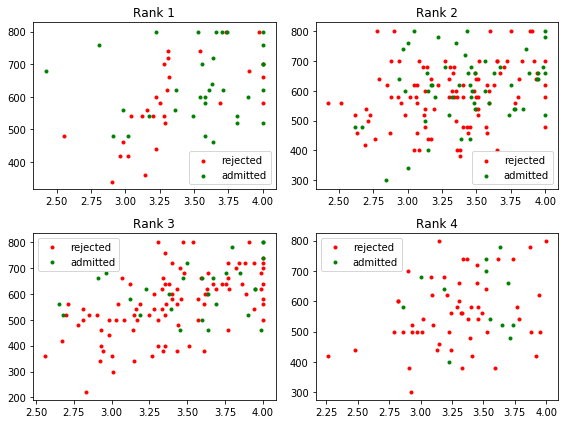

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[8,6])
axes = axes.flatten()
for i, rank in enumerate([1,2,3,4]):
    # pick not-admitted students with given rank
    tmp = df.loc[(df['rank']==rank) & (df['admit']==0)]
    axes[i].scatter(tmp['gpa'], tmp['gre'], color='red', marker='.', label='rejected')
    # pick admitted students with given rank
    tmp = df.loc[(df['rank']==rank) & (df['admit']==1)]
    axes[i].scatter(tmp['gpa'], tmp['gre'], color='green', marker='.', label='admitted')
    axes[i].set_title('Rank '+str(rank))
    axes[i].legend()
fig.tight_layout()

#### Preprocess

Code below does following things:
* convert _rank_ column into one-hot encoded features
* normalize _gre_ and _gpa_ columns to zero mean and unit standard deviation
* splits of 20% of data as test set
* splits into input features (gre, gpa, one-hot-rank) and targets (admit)
* convert into numpy
* assert shapes are ok

In [17]:
# Create dummies
temp = pd.get_dummies(df['rank'], prefix='rank')
data = pd.concat([df, temp], axis=1)
data.drop(columns='rank', inplace=True)

# Normalize
for col in ['gre', 'gpa']:
    mean, std = data[col].mean(), data[col].std()
    # data.loc[:, col] = (data[col]-mean) / std
    data[col] = (data[col]-mean) / std

# Split off random 20% of the data for testing
np.random.seed(0)
sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False)
data, test_data = data.iloc[sample], data.drop(sample)

# Split into features and targets
features_train = data.drop('admit', axis=1)
targets_train =  data['admit']
features_test = test_data.drop('admit', axis=1)
targets_test = test_data['admit']

# Convert to numpy
x_train = features_train.values            # features train set (numpy)
y_train = targets_train.values[:,None]     # targets train set (numpy)
x_test = features_test.values              # features validation set (numpy)
y_test = targets_test.values[:,None]       # targets valudation set (numpy)

# Assert shapes came right way around
assert x_train.shape == (360, 6)
assert y_train.shape == (360, 1)
assert x_test.shape == (40, 6)
assert y_test.shape == (40, 1)

#### Train Classifier

Create neural network

In [18]:
# Hyperparams
nb_epochs = 2000
lr = 1

# Initialize
np.random.seed(0)                                                       # for reproducibility
n_inputs, n_outputs = x_train.shape[1], 1                               # get dataset shape
W = np.random.normal(scale=n_inputs**-.5, size=[n_inputs, n_outputs])   # Xavier init
b = np.zeros(shape=[1, n_outputs])

Before training

In [19]:
forward(x_train, W, b).round(3)[0:10]

array([[0.705],
       [0.417],
       [0.568],
       [0.746],
       [0.813],
       [0.736],
       [0.338],
       [0.473],
       [0.588],
       [0.744]])

In [20]:
losses = train_classifier(x_train, y_train, nb_epochs, W, b)

loss  0.8337
loss  0.5708
loss  0.5708
loss  0.5708
loss  0.5708
loss  0.5708
loss  0.5708
loss  0.5708
loss  0.5708
loss  0.5708


After training

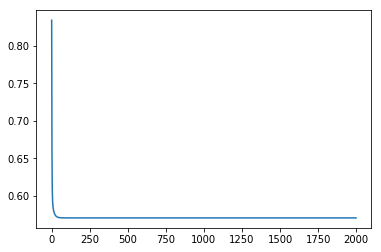

In [21]:
plt.plot(losses)

In [22]:
pred = forward(x_train, W, b)
pred = pred > 0.5
acc = np.mean(pred == y_train)
print('Accuracy on training set (expected ~0.7):', acc.round(2))

Accuracy on training set (expected ~0.7): 0.7


In [23]:
pred = forward(x_test, W, b)
pred = pred > 0.5
acc = np.mean(pred == y_test)
print('Accuracy on test set (expected ~0.75):', acc.round(2))

Accuracy on test set (expected ~0.75): 0.75


Note: accuracy on test set is usually worse than training set. College admissions dataset is very small and we just got lucky with easy test set when splitting into train/test sets.

# Numerical Gradient Check

Run this cell if you want to perform numerical gradient check in train_classifier()

In [24]:
def numerical_gradient(x, y, W, b):
    """Check gradient numerically"""
    assert W.ndim == 2
    assert b.ndim == 2
    assert b.shape[0] == 1
    
    eps = 1e-4
    
    # Weights
    del_W = np.zeros_like(W)    
    for r in range(W.shape[0]):
        for c in range(W.shape[1]):
            W_min = W.copy()
            W_pls = W.copy()
            
            W_min[r, c] -= eps
            W_pls[r, c] += eps
            
            y_hat_pls = forward(x, W_pls, b)
            y_hat_min = forward(x, W_min, b)
            
            l_pls = loss(y, y_hat_pls)
            l_min = loss(y, y_hat_min)

            del_W[r, c] = (l_pls - l_min) / (eps * 2)
            
    # Biases
    del_b = np.zeros_like(b)
    for c in range(b.shape[1]):
        b_min = b.copy()
        b_pls = b.copy()
            
        b_min[0, c] -= eps
        b_pls[0, c] += eps
            
        y_hat_pls = forward(x, W, b_pls)
        y_hat_min = forward(x, W, b_min)
            
        l_pls = loss(y, y_hat_pls)
        l_min = loss(y, y_hat_min)

        del_b[0, c] = (l_pls - l_min) / (eps * 2)
    
    return del_W, del_b